#### **1** Lectura de los datos

In [1]:
import pandas as pd

datos = pd.read_csv("./Colecta_4.csv", sep=",", engine="python")

#### **2** Visualización de los datos (gráficos)

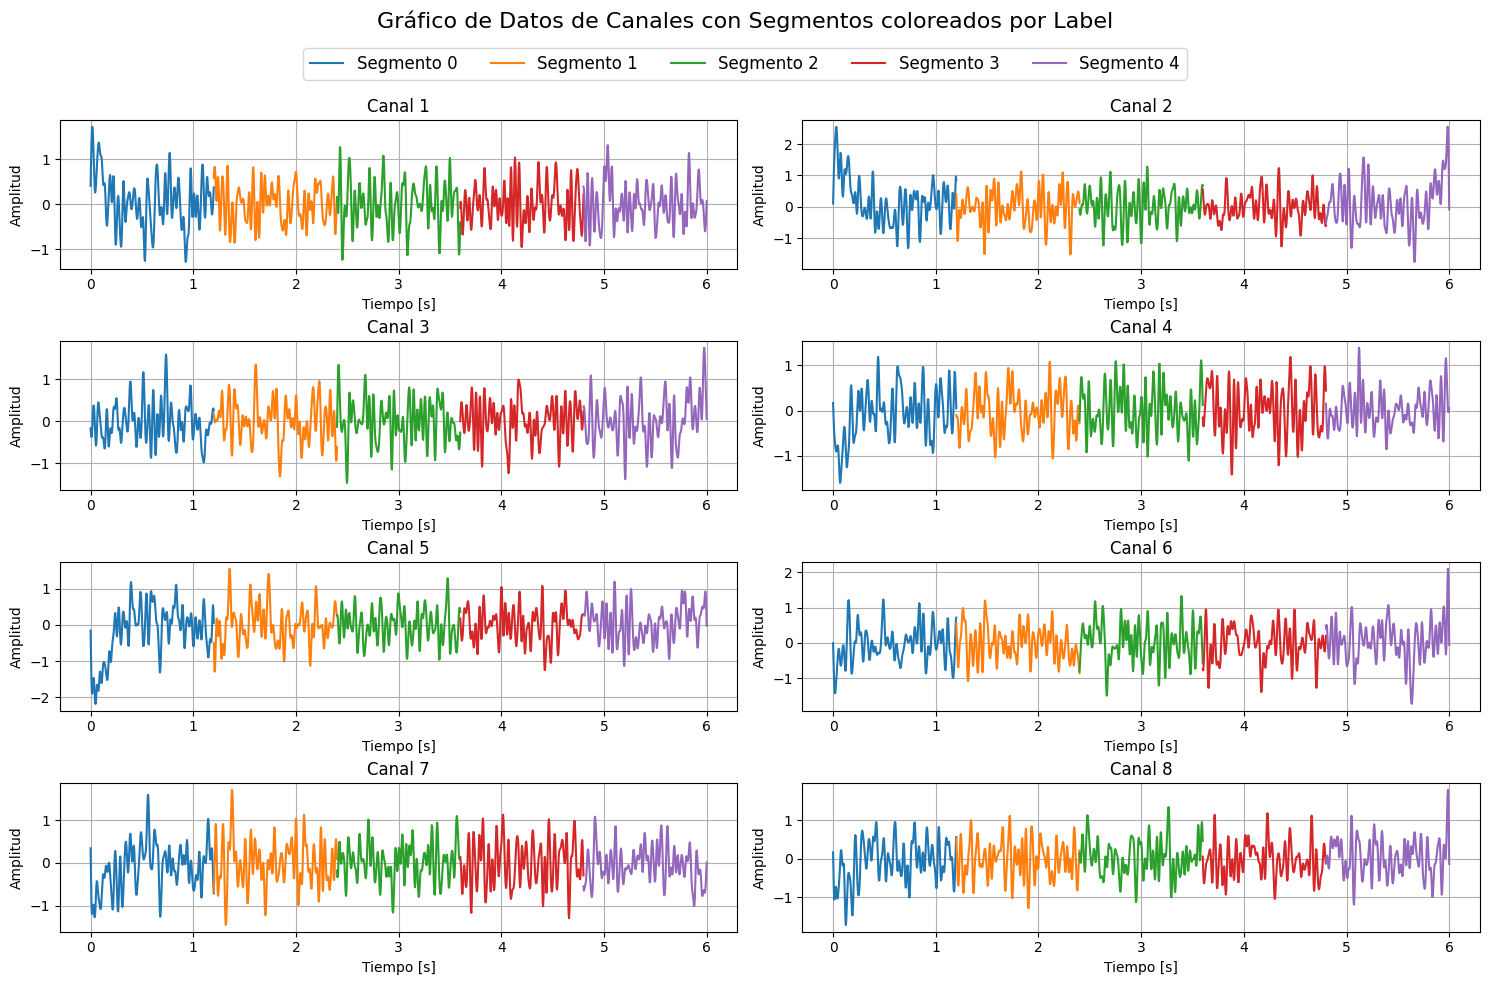

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Ts = 1 / 250


channels = [
    ("Canal 1"),
    ("Canal 2"),
    ("Canal 3"),
    ("Canal 4"),
    ("Canal 5"),
    ("Canal 6"),
    ("Canal 7"),
    ("Canal 8"),
]

fig, ax = plt.subplots(4, 2, figsize=(15, 10))

for i, channel in enumerate(channels):
    row = i // 2
    col = i % 2
    start = 0
    for j in range(5):
        canales = datos.loc[datos["Label"] == j, [channel]]
        time = np.linspace(start, start + (len(canales) * Ts), len(canales))
        ax[row, col].plot(time, canales, label=f"Segmento {j}")
        ax[row, col].set_title(f"{channel}")
        ax[row, col].set_ylabel("Amplitud")
        ax[row, col].set_xlabel("Tiempo [s]")
        ax[row, col].grid(True)
        start += len(canales) * Ts

plt.tight_layout()
plt.subplots_adjust(top=0.87)
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=5, fontsize=12
)
fig.suptitle(
    "Gráfico de Datos de Canales con Segmentos coloreados por Label", fontsize=16
)
plt.show()

#### **3** Ventaneo 

In [ ]:
# Rangos del vantaneo
# Segmento 0 (0-299)
# Segmento 1 (300-599)
# Segmento 2 (600-899)
# Segmento 3 (900-1199)
# Segmento 4 (1200-1499)

lim_inf = 0
lim_sup = 25
channel_id = "Canal 3"
segment = 2

channel_win = datos.loc[datos["Label"] == segment, [channel_id]][lim_inf:lim_sup]
plt.figure(figsize=(10, 6))
plt.plot(channel_win[channel_id], label="Datos")
plt.legend()
plt.title(
    f"Ventaneo de los datos del {channel_id} en el Segmento {segment} en un intervalo de {lim_inf} a {lim_sup}"
)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

#### **4** Cruces por cero con ventaneo y sin ventaneo

In [ ]:
# Rangos del vantaneo
# Segmento 0 (0-299)
# Segmento 1 (300-599)
# Segmento 2 (600-899)
# Segmento 3 (900-1199)
# Segmento 4 (1200-1499)

lim_inf = 0
lim_sup = 50
channel_id = "Canal 8"
segment = 2

channel = datos[channel_id]
channel_win = datos.loc[datos["Label"] == segment, [channel_id]][lim_inf:lim_sup]
val_channel_win = channel_win[channel_id]


def zero(channel):
    return np.where(np.diff(np.sign(channel)))[0]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
ax1.plot(datos[channel_id], label=f"Datos del {channel_id}")
ax1.scatter(
    zero(channel),
    channel.iloc[zero(channel)],
    color="red",
    label="Cruces por cero",
    zorder=10,
)
ax1.set_title(f"Cruces por Cero en los Datos para el {channel_id}")
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Amplitud")
ax1.grid(True)
ax2.plot(
    channel_win[channel_id], label=f"Datos del {channel_id} en el Segmento {segment}"
)
ax2.scatter(
    zero(val_channel_win) + val_channel_win.index[0],
    val_channel_win.iloc[zero(val_channel_win)],
    color="red",
    label="Cruces por cero",
    zorder=10,
)
ax2.set_title(
    f"Cruces por Cero en los Datos para el {channel_id} en el segmento {segment} en un intervalo de {lim_inf} a {lim_sup}",
    fontsize=9,
)
ax2.set_xlabel("Tiempo")
ax2.set_ylabel("Amplitud")
ax2.grid(True)
plt.show()

#### **5** Encontrar picos con ventaneo y sin ventaneo

In [ ]:
from scipy.signal import find_peaks

# Rangos del vantaneo
# Segmento 0 (0-299)
# Segmento 1 (300-599)
# Segmento 2 (600-899)
# Segmento 3 (900-1199)
# Segmento 4 (1200-1499)

lim_inf = 0
lim_sup = 50
channel_id = "Canal 8"
segment = 2

channel_win = datos.loc[datos["Label"] == segment, [channel_id]][lim_inf:lim_sup]
channel = datos["Canal 1"]
val_channel_win = channel_win[channel_id]


peaks_channel, _ = find_peaks(channel)
peaks_channel_win, _ = find_peaks(val_channel_win)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
ax1.plot(channel)
ax1.plot(channel[peaks_channel], "ro")
ax1.set_title(f"Picos Máximos en los Datos para el {channel_id}")
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Amplitud")
ax1.grid(True)
ax2.plot(val_channel_win)
ax2.plot(
    peaks_channel_win + val_channel_win.index[0],
    val_channel_win.iloc[peaks_channel_win],
    "ro",
)
ax2.set_title(
    f"Picos Máximos en los Datos para el {channel_id} en el segmento {segment} en un intervalo de {lim_inf} a {lim_sup}",
    fontsize=10,
)
ax2.set_xlabel("Tiempo")
ax2.set_ylabel("Amplitud")
ax2.grid(True)
plt.show()

#### **Conclusión**

La práctica de laboratorio de procesamiento de señales digitales se estructuró en varios pasos fundamentales. Primero, se llevó a cabo la lectura de los datos desde un archivo CSV, lo cual es esencial para cualquier análisis subsiguiente. Luego, se procedió a la visualización de los datos mediante gráficos, lo que proporciona una comprensión inicial de la naturaleza de los datos y posibles patrones. Posteriormente, se aplicó el ventaneo, dividiendo los datos en segmentos específicos, lo que permite un análisis más detallado y focalizado en intervalos específicos de los datos. Se realizaron análisis de cruces por cero y la identificación de picos máximos tanto con como sin ventaneo, demostrando cómo estas técnicas pueden revelar características importantes de las señales, como transiciones y puntos destacados, lo que es crucial para comprender su comportamiento y aplicaciones prácticas.

#### **Parte 2**

In [1]:
import pandas as pd
import numpy as np

datos = pd.read_csv("Colecta_4.csv", sep=",", engine="python")
# Agregar vector tiempo al dataframe
data_labels = []
for i in range(5):
    data = datos.loc[
        datos["Label"] == i,
        [
            "Canal 1",
            "Canal 2",
            "Canal 3",
            "Canal 4",
            "Canal 5",
            "Canal 6",
            "Canal 7",
            "Canal 8",
        ],
    ]
    data_labels.append(data)
channels = [
    "Canal 1",
    "Canal 2",
    "Canal 3",
    "Canal 4",
    "Canal 5",
    "Canal 6",
    "Canal 7",
    "Canal 8",
]

# Crear diccionario
win_data = {
    "Canal 1": [],
    "Canal 2": [],
    "Canal 3": [],
    "Canal 4": [],
    "Canal 5": [],
    "Canal 6": [],
    "Canal 7": [],
    "Canal 8": [],
}

# Tamaño del ventaneo
win_size = 49
# Inicio de la ventana
initial_position_window = 0
# Lista auxiliar
listAux = []
labels = []

for c, canal in enumerate(channels):
    for l in range(5):
        data = data_labels[l][canal].tolist()
        for a in range(int(len(data) / 24)):
            labels.append(l)
            win_len = (
                len(data) - initial_position_window
                if (len(data) - initial_position_window) < win_size
                else win_size
            )
            for b in range(win_len):
                listAux.append(data[b + initial_position_window])
            win_data[canal].append(listAux)
            listAux = []
            initial_position_window += 24
        data = []
        initial_position_window = 0

# Crear dataframe con los datos ventaneados
df_window = pd.DataFrame(win_data)
# Agregar al dataframe LABEL
df_window["Label"] = labels[:60]

#### **Funciones para clasificación de señales EMG** 

In [2]:
def IEMG(window):
    return np.sum(np.abs(window))


def MAV(window):
    N = len(window)
    return (1 / N) * np.sum(np.abs(window))


def MAV1_values(N, i):
    if (0.25 * N <= i) and (i <= 0.75 * N):
        return 1
    else:
        return 0.5


def MAV2_values(N, i):
    if (0.25 * N <= i) and (i <= 0.75 * N):
        return 1
    elif i < 0.25 * N:
        return 4 * i / N
    else:
        return 4 * (i - N) / N


def MAV1(window):
    N = len(window)
    mav1 = 0
    for i in range(len(window)):
        mav1 += abs(window[i]) * MAV1_values(N, i)
    return (1 / N) * mav1


def MAV2(window):
    N = len(window)
    mav2 = 0
    for i in range(len(window)):
        mav2 += abs(window[i]) * MAV2_values(N, i)
    return (1 / N) * mav2


def SSI(window):
    ssi = 0
    for dato in window:
        ssi += dato**2
    return ssi

In [3]:
emg_analysis = {
    "Canal": [],
    "Label": [],
    "IEMG": [],
    "MAV": [],
    "MAV1": [],
    "MAV2": [],
    "SSI": [],
}
for channel in channels:
    for w in range(len(df_window[channel])):
        window = df_window[channel][w]
        emg_analysis["Canal"].append(channel)
        emg_analysis["Label"].append(df_window["Label"][w])
        emg_analysis["IEMG"].append(IEMG(window))
        emg_analysis["MAV"].append(MAV(window))
        emg_analysis["MAV1"].append(MAV1(window))
        emg_analysis["MAV2"].append(MAV2(window))
        emg_analysis["SSI"].append(SSI(window))

result = pd.DataFrame(emg_analysis)
print(result)

       Canal  Label       IEMG       MAV      MAV1      MAV2        SSI
0    Canal 1      0  37.308127  0.761390  0.588383  0.479630  38.434186
1    Canal 1      0  22.131331  0.451660  0.313979  0.181141  14.288599
2    Canal 1      0  17.764505  0.362541  0.288707  0.242220   9.891445
3    Canal 1      0  12.713367  0.259456  0.174688  0.115010   5.775273
4    Canal 1      0  16.012529  0.326786  0.255512  0.148431   9.529523
..       ...    ...        ...       ...       ...       ...        ...
475  Canal 8      4  12.834325  0.261925  0.194639  0.125365   4.695111
476  Canal 8      4  15.309711  0.312443  0.219579  0.093403   7.168805
477  Canal 8      4  19.316406  0.394212  0.302536  0.160727  10.910865
478  Canal 8      4  19.562384  0.399232  0.297669  0.176228  11.127391
479  Canal 8      4  17.060827  0.473912  0.337136  0.109789  15.665805

[480 rows x 7 columns]


#### **Conclusión**

En este proyecto, se creó un procedimiento para examinar los datos que incluyó dividir los datos en intervalos de tamaño específico. Luego, se calcularon diversas medidas de señales para cada intervalo, como la IEMG (Integral del Valor Absoluto de la Señal), MAV (Valor Absoluto Medio) y SSI (Suma del Cuadrado de la Señal). Se utilizó Python en conjunto con bibliotecas como Pandas y NumPy para gestionar eficazmente los datos y llevar a cabo los cálculos necesarios. Después, los resultados del análisis se organizaron en un formato de datos para facilitar su manipulación y visualización. Este enfoque permitió obtener una comprensión detallada del comportamiento de las señales en diferentes secciones de los datos, lo cual resultó fundamental para el análisis y la interpretación de los datos recolectados.

In [ ]:
!jupyter nbconvert --to latex "./lab3.ipynb"